# networkX tutorial

In [1]:
# import statements 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx       

## A little background on how graphs work in `networkX`

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any hashable object (except `None`) e.g., a text string, an image, an XML object, another
Graph, a customized node object, etc. This would allow us to create some unique agent ID associated with each farmer or urban agent and have them as nodes.

## Generating graphs

You can generate graphs in different ways. You can build a graph node by node, or edge by edge. You can also generate graphs from existing adjacency matrices, numpy matrices or using a graph generator.

### Node by node and edge by edge

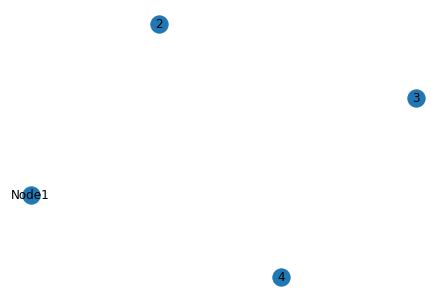

In [2]:
# instantiating an undirected, single-edge graph
G = nx.Graph()

# nodes can be strings -- careful! If you do 'add_nodes_from('Node1')' five new nodes will be added
G.add_node('Node1')

# nodes can be integers as well - so long as they are unique!
G.add_node(2)
G.add_nodes_from([3,4])

# adding a duplicate node does not work, though it doesn't throw an error
G.add_node(2)

# we can see a pretty simplistic view of the graph we have so far
nx.draw(G, with_labels=True)

Notice that nodes can be different in terms of data type. There is no `Node` object, rather each node is assigned some unique identifier, be it a string or integer or some hashable object. This graph is pretty basic -- let's add in some edges manually. We can do this in a similar fashion as how we've added in the nodes.

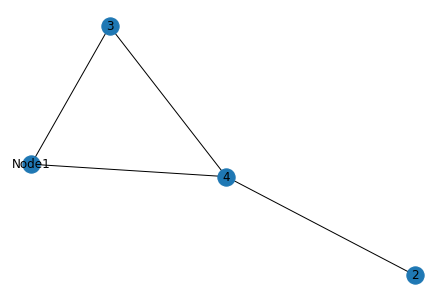

In [3]:
# we can add in a single edge
G.add_edge('Node1', 4)

# we can also pass in a list of tuples
G.add_edges_from([(2,4), ('Node1',3), (3,4)])

# let's look at the graph now
nx.draw(G, with_labels=True)

These are the basic functionalities of creating a graph manually. Of course there are more sophisticated ways these graphs can be created.

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods `G.remove_node()`, `G.remove_nodes_from()`, `G.remove_edge()` and `G.remove_edges_from()`, e.g.

### Importing a graph from an existing adjacency matrix


Let's get rid of the nodes and edges from the earlier example. If we try to draw an empty graph object, we get nothing!

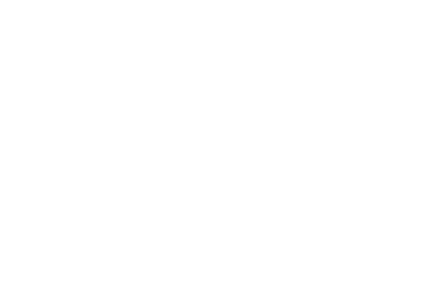

In [4]:
G.clear()
nx.draw(G)

Let's make a sample adjacency list by just writing to a file. The format of the list starts with the source node, and each subsequent is the node connected to the source. In the following code, `node1` is connected to `node2` and `node3`, and `node6` is connected to `node2`.

In [5]:
# this will create a file in the current directory
f = open('adjacency_read.txt', 'w')
f.write('node1 node2 node3 \nnode6 node2 node3 \nnode7')
f.close()

Now we can use this file to write to a graph.

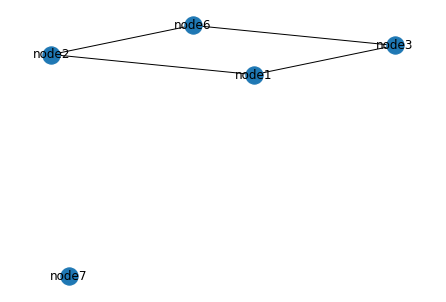

In [6]:
G = nx.readwrite.adjlist.read_adjlist('adjacency_read.txt')
nx.draw(G, with_labels=True)

We can also write this adjacency list to a file from the `Graph` directly.

In [7]:
# this will write out a file in your current directory
nx.readwrite.adjlist.write_adjlist(G, 'adjacency_write.txt')

We'll read it in again to make sure it matches with the above graph.

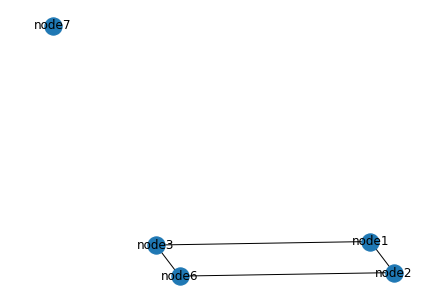

In [8]:
H = nx.readwrite.adjlist.read_adjlist('adjacency_write.txt')
nx.draw(H, with_labels=True)

# clearing out all old node and edge data while maintaing graph structure
G.clear()
H.clear()

Yep! It matches! (even though the graph portrayal may look different.)

**Note:** When reading and writing adjacency lists, node data could be lost. For example, if each node had an attribute we cared about besides its node identifier, there is no way to pass that through in an adjacency list. This only transfers information about the relationships between nodes, and not about the nodes themselves.

### Using `numpy` matrices as adjacency matrices

[[0 0 0 1]
 [0 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]


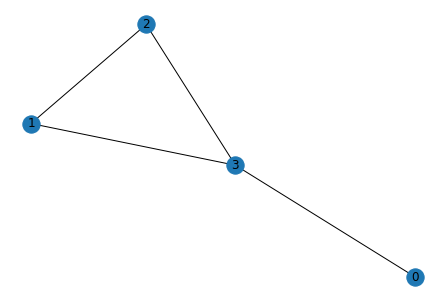

In [9]:
A = np.array([[0, 0, 0, 1], [0, 0, 1, 1], [0,1,0,1], [1,1,1,0]])
G = nx.from_numpy_matrix(A)
print(A)
nx.draw(G, with_labels=True)

Conversely, we can export this graph's adjacency matrix to a `numpy` matrix.

In [10]:
B = nx.to_numpy_matrix(G)
print(B)

[[0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]]


### Random graph generators

#### Erdos Renyi Graph
There are many types of graph generators that can be accessed [here](https://networkx.github.io/documentation/stable/reference/generators.html#module-networkx.generators.random_graphs). I'll start with the [Erdos-Renyi graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph) that Vicken has mentioned.

To call, use:

`nx.generators.random_graphs.erdos_renyi_graph(n, p, seed=None, directed=False)` 

where 

`n` is number of nodes

`p` is probability of edge creation

`seed` (default is `None`) is the indicator of random number generation

`directed` (default is `False`) is a `bool` type indicating if the graph has directional edges. 

Text(0.5, 1.0, 'Erdos-Renyi Random Graph Generator')

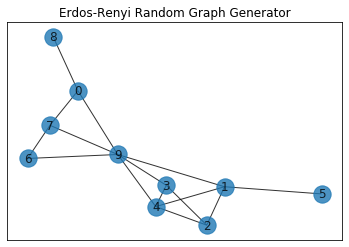

In [11]:
# clearing out old graph data (not necessary but want to keep consistent)
G.clear()

# number of nodes
n = 10
p = 0.3   # feel free to play around with this
seed = 19 # optional
directed = False # optional 
G = nx.generators.random_graphs.erdos_renyi_graph(n, p, seed, directed)
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Erdos-Renyi Random Graph Generator')

#### Barabasi-Albert
Another similar graph generator. See [here](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html). You can call it by using `nx.generators.random_graphs.barabasi_albert_graph(n, m, seed=None)`

According to the documentation, it will return: 
> A graph of `n` nodes which is grown by attaching new nodes each with `m` edges that are preferentially attached to existing nodes with high degree.

**Note!** `m` must always be $\geq 1$ and $ <$ `n`

Vicken might need to help explain what some of this means and how this fits into our research question.

Text(0.5, 1.0, 'Barabasi-Albert Graph')

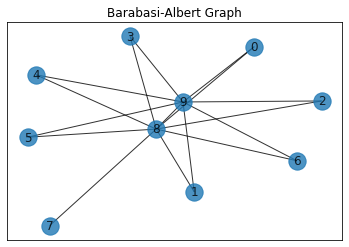

In [12]:
# clearing out old graph data
G.clear()

# we'll keep the same number of nodes and seed as before
m = 8
G = nx.generators.random_graphs.barabasi_albert_graph(n,m,seed)

# plotting
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Barabasi-Albert Graph')

#### Watts-Strogatz small-world graph

See [here](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html). 

Can be called using `nx.generators.random_graphs.watts_strogatz_graph(n,k,p,seed=None)`

According to the documentation:
> First create a ring over `n` nodes. Then each node in the ring is connected with its `k` nearest neighbors (`k-1` neighbors if `k` is odd). Then shortcuts are created by replacing some edges as follows: for each edge u-v in the underlying “`n`-ring with `k` nearest neighbors” with probability `p` replace it with a new edge u-w with uniformly random choice of existing node w.

Text(0.5, 1.0, 'Watts-Strogatz Graph')

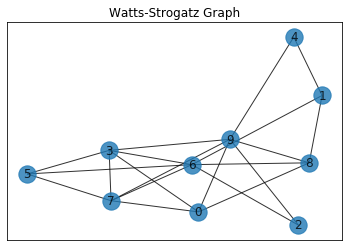

In [13]:
# clearing out old graph data
G.clear()

# we'll keep the same number of nodes and seed as before
k = 5
p = 0.7
G = nx.generators.random_graphs.watts_strogatz_graph(n,k,p,seed)

# plotting
nx.draw_networkx(G, with_labels=True, alpha=0.8)
plt.title('Watts-Strogatz Graph')